# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [25]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('/Users/user/lab-subsetting-and-descriptive-stats/your-code/Temp_States.csv')


#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
temp.dtypes
#tenemos dos columnas que incluyen string, por eso aparcen como objeto 
#y uno que es de temperatura y por eso aparece como float

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [8]:
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [9]:
NY = temp[temp.State == 'New York']
NY['Temperature'].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [16]:
temp[temp.Temperature > 15][['City', 'State']]
#Cuando solicitamos más de una columna para visualizar estos se ponen en doble corchete 


,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [18]:
temp[temp.Temperature > 15][['City']]
#temp[temp.Temperature > 15]['City']
#si solo dejamos la columna solicitada en un solo corchete lo visualiza como serie

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [22]:
temp[(temp.Temperature > 15)&(temp.Temperature < 20)][['City']]
#primero escribí la condicion y posterior escogí la columna necesaria, la condicion debe de ir entre parentesis además
#de los corchetes


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [24]:
temp.groupby('State').agg({'Temperature':['mean','std']})


Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [26]:
employee = pd.read_csv('/Users/user/lab-subsetting-and-descriptive-stats/your-code/Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [32]:
employee.dtypes
#las columnas que describen alguna característica estan en formato objeto 
#año lo está reconociendo como un entero, revisando la data es una cuenta de los años que el trabajador ha colaborado ahi


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [42]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

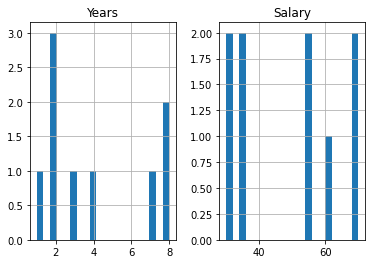

In [43]:
employee.hist(bins=20)
#los histográmas muestran la frecuencia de datos númericos y reporta la frecuencia
#Years: la mayoría de los empleados tienen de 1 a 3 años y una minoría rebasa los 7 años
#Salary: en su mayoría, los empleados con mayor antigüedad son los que tienen salarios más altos 

#### What's the average salary in this company?

In [44]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [45]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [46]:
employee['Salary'].min()


30

#### Who are the employees with the lowest salary?

In [60]:
employee['Name'][employee['Salary'] == employee['Salary'].min()]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [61]:
employee.query('Name=="David"')


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [63]:
employee.query('Name=="David"')['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [64]:
employee.query('Title =="associate"')

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [65]:
employee[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [66]:
employee.iloc[0:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [67]:
employee[(employee.Title=='associate')&(employee.Salary> 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [68]:
employee.groupby('Years')[['Salary']].mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [69]:
employee.groupby('Title')[['Salary']].mean()

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

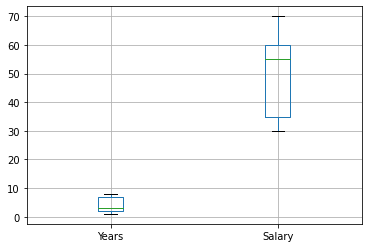

In [70]:
employee.boxplot()

In [71]:
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [72]:
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [74]:
employee.groupby('Gender')[['Salary']].mean()
#es diferente

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [80]:
employee.groupby('Department').agg(['min','mean','max'])

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
employee.groupby('Department')

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [83]:
orders = pd.read_csv('/Users/user/lab-subsetting-and-descriptive-stats/your-code/Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [82]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [84]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [85]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [86]:
orders['amount_spent'].max()

168469.6

In [87]:
orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [96]:
orders.query('Country =="Spain"')['CustomerID'].unique().tolist()

[12557,
 17097,
 12540,
 12551,
 12484,
 12539,
 12510,
 12421,
 12502,
 12462,
 12507,
 12541,
 12547,
 12597,
 12545,
 12596,
 12354,
 12417,
 12455,
 12450,
 12548,
 12556,
 12550,
 12546,
 12454,
 12448,
 12544,
 12538,
 12445,
 12442]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [97]:
orders.query('Country =="Spain"')['CustomerID'].value_counts()

12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12547      8
12450      8
12548      5
12445      4
Name: CustomerID, dtype: int64

In [98]:
print(len(orders.query('Country =="Spain"')['CustomerID']))

2485


#### Select all the customers who have bought more than 50 items ?

In [112]:
empleados = orders.groupby('CustomerID')['Quantity'].sum().reset_index()
empleados[(empleados.Quantity > 50)]

,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4333,18278,66
4335,18281,54
4336,18282,103
4337,18283,1397


#### Select orders from Spain that are above 50 items

In [124]:
orders[(orders.Country=='Spain')&(orders.Quantity> 50)][['CustomerID','Quantity']].sort_values('Quantity').reset_index(drop=True)

,CustomerID,Quantity
0,12557,60
1,12484,60
2,12557,70
3,12557,70
4,12557,72
5,12597,72
6,12597,72
7,12597,72
8,12454,72
9,12454,72


#### Select all free orders

In [126]:
orders.query('amount_spent =="0.0"').reset_index(drop=True)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
1,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
2,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
3,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
4,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
5,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
6,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
7,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
8,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
9,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [128]:
orders[orders['Description'].str.contains('lunch bag')].reset_index(drop=True)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
1,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
2,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
3,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
4,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
11552,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
11553,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
11554,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [135]:
orders[(orders.year ==2011)&(orders['Description'].str.contains('lunch bag'))]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

array([[<AxesSubplot:title={'center':'amount_spent'}>]], dtype=object)

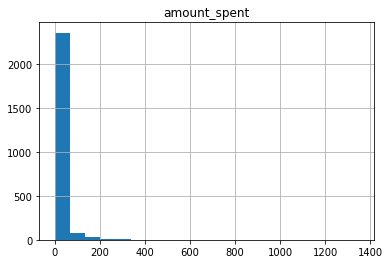

In [144]:
frecuencia = orders.query('Country =="Spain"')[['amount_spent']].reset_index(drop=True)
frecuencia.hist(bins=20)

#### Select all orders made in the month of August

In [154]:
orders[orders.month == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [159]:
orders[orders.month == 8]['Country'].value_counts()


United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [160]:
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [166]:
orders['UnitPrice'].max()

8142.75

#### What was the average amount spent per year ?

In [167]:
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64